<a href="https://colab.research.google.com/github/rokshana10/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module2-make-features/LS_DS_112_Make_Features/Module%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 2*

---

# Make Features 

- Student should be able to understand the purpose of feature engineering
- Student should be able to work with strings in pandas
- Student should be able to work with dates and times in pandas
- Student should be able to modify or create columns of a dataframe using the `.apply()` function


Helpful Links:
- [Minimally Sufficient Pandas](https://medium.com/dunder-data/minimally-sufficient-pandas-a8e67f2a2428)
- [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
- Python Data Science Handbook
  - [Chapter 3.10](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html), Vectorized String Operations
  - [Chapter 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html), Working with Time Series
- [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)

# [Objective](#feature-engineering) - The Purpose of Feature Engineering



## Overview

Feature Engineering is the process of using a combination of domain knowledge, creativity and the pre-existing columns of a dataset to create completely new columns.

 Machine Learning models try to detect patterns in the data and then associate those patterns with certain predictions. The hope is that by creating new columns on our dataset that we can expose our model to new patterns in the data so that it can make better and better predictions.

This is largely a matter of understanding how to work with individual columns of a dataframe with Pandas --which is what we'll be practicing today!

## Follow Along

Columns of a dataframe hold each hold a specific type of data. Lets inspect some of the common datatypes found in datasets and then we'll make a new feature on a dataset using pre-existing columns.

In [0]:
import pandas as pd

In [0]:
# Lets take a look at the Ames Iowa Housing Dataset:
iowa_df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')


In [57]:
iowa_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Specific Columns hold specific kinds of data

In [36]:

pd.set_option('display.max_rows', 100)
iowa_df.dtypes[:5]

Id               int64
MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
dtype: object

In [37]:
# Shape
iowa_df.shape

(1460, 81)

Some columns hold integer values like the `BedroomAbvGr` which stands for "Bedrooms Above Grade." This is the number of non-basement bedrooms in the home.

For more information on specific column meanings view the [data dictionary](https://github.com/ryanleeallred/datasets/blob/master/Ames%20Housing%20Data/data_description.txt).

In [38]:
# First ten rows of the 'BedroomAvGr' column.
# Looks like interger
iowa_df[['BedroomAbvGr', 'Fireplaces']].sample(4)


,BedroomAbvGr,Fireplaces
223,2,0
1228,1,1
532,2,1
663,3,0


In [0]:
# Look at the first ten rows of the `BedroomAbvGr` column.
# Looks like integers to me!


In [39]:
iowa_df[['BedroomAbvGr', 'Fireplaces']].head(1)

,BedroomAbvGr,Fireplaces
0,3,0


In [40]:
# First 10 rows
iowa_df['LotFrontage'].head(10)

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
5    85.0
6    75.0
7     NaN
8    51.0
9    50.0
Name: LotFrontage, dtype: float64

In [41]:
# Shape
iowa_df.shape

(1460, 81)

In [42]:
# Describe
iowa_df['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [43]:
# Column types
pd.set_option('display.max_rows', 100)
iowa_df.dtypes[:7]

Id               int64
MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
Street          object
Alley           object
dtype: object

Some columns hold float values like the `LotFrontage` column.

In [45]:
# Look at the first ten rows of the `BedroomAbvGr` column.
iowa_df[['BedroomAbvGr', 'Fireplaces']].sample(4)


,BedroomAbvGr,Fireplaces
651,4,1
257,3,1
205,3,0
666,3,1


Hmmm, do the values above look like floats to you?

They all have .0 on them so technically they're being stored as floats, but *should* they be stored as floats?

Lets see what all of the possible values for this column are.

In [46]:
# What is the type of NaN?
type(np.nan)

float

Looks to me like the `LotFrontage` column originally held integer values but was cast to a `float` meaning that each original integer values was converted to its corresponding float representation. 

Any guesses as to why that would have happened?


HINT: What's the most common `LotFrontage` value for this column?

In [0]:
# NaN is the most common value in this column. What is a NaN
import pandas as pd


`NaN` stands stands for "Not a Number" and is the default missing value indicator with Pandas. This means there were cells in this column that didn't have a LotFrontage value recorded for those homes. 

This is where domain knowledge starts to come in. Think about the context we're working with here: houses. What might a null or blank cell representing "Linear feet of street connected to property" mean in the context of a housing dataset?

Ok, so maybe it makes seanse to have some NaNs in this column. What is the datatype of a NaN value?

Perhaps some of this data is truly missing or unrecorded data, but sometimes `NaNs` are more likely to indicate something that was "NA" or "Not Applicable" to a particular observation. There could be multiple reasons why there was no value recorded for a particular feature.

Remember, that Pandas tries to maintain a single datatype for all values in a column, and therefore...

In [0]:
import numpy as np

# What is the datatype of NaN?

The datatype of a NaN is float!  This means that if we have a column of integer values, but the column has even a single `NaN` that column will not be treated with the integer datatype but all of the integers will be converted to floats in order to try and preserve the same datatype throughout the entire column.

You can see already how understanding column datatypes is crucial to understanding how Pandas help us manage our data.

In [60]:
# How much missing Data
iowa_df['LotFrontage'].isnull().sum()

0

In [0]:

# Drop missing data
iowa_df['LotFrontage'].dropna(inplace=True)

In [62]:


#  How much missing data
iowa_df['LotFrontage'].isnull().sum()


0

### Making new Features

Lets slim down the dataset and consider just a few specific columns:

- `TotalBsmtSF`
- `1stFlrSF`
- `2ndFlrSF`
- `SalePrice1`


In [63]:
# I can make a smaller dataframe with a few specific column headers
# by passing a list of column headers inside of the square brackets

small_df = iowa_df[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'SalePrice']].copy()
small_df.sample(3)

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice
472,547,1072,0,148000
544,654,664,832,179665
80,896,1182,960,193500


### Syntax for creating new columns

When making a new column on a dataframe, we have to use the square bracket syntax of accessing a column. We can't use "dot syntax" here.

In [64]:
# Lets add up all of the square footage to get a single square footage 
# column for the entire dataset
small_df['TotalSF'] = small_df['TotalBsmtSF'] + small_df['1stFlrSF'] + small_df['2ndFlrSF']
# Using bracket syntax to make a new 'TotalSquareFootage' column
small_df.head(3)

# Using bracket syntax to make a new 'TotalSquareFootage' column

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSF
0,856,856,854,208500,2566
1,1262,1262,0,181500,2524
2,920,920,866,223500,2706


In [65]:
# Lets make a nother new column that is 'PricePerSqFt' by
# dividing the price by the square footage
small_df['PricePerSF'] = small_df['SalePrice'] / small_df['TotalSF']
small_df.head(3)


,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSF,PricePerSF
0,856,856,854,208500,2566,81.254871
1,1262,1262,0,181500,2524,71.909667
2,920,920,866,223500,2706,82.594235


Ok, we have made two new columns on our small dataset.

- What does a **high** `PricePerSqFt` say about a home that the square footage and price alone don't capture as directly?

- What does a **low** `PricePerSqFt` say about a home that the square footage and price alone don't directly capture?



In [66]:

# Crosstabs
iowa_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [56]:
# Crosstabs
iowa_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [67]:
# Categorical variable
iowa_df['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [68]:
 # Categorical variable
iowa_df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [70]:
# Sale condition
iowa_df['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [71]:
# Create a new categorical variable
iowa_df['HouseStyle'] = np.where(iowa_df['RoofStyle']=='Normal', 'Yes', 'No')
iowa_df['HouseStyle'].value_counts()

No    1460
Name: HouseStyle, dtype: int64

In [72]:
# value counts of a categorical variable
iowa_df['PoolArea'].value_counts()

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

In [0]:
 # Map this from four down to 3 values
iowa_df['LotShape3']=iowa_df['LotShape'].map({'Reg':'Regular', 
                                              'IR1':'Irregular', 
                                              'IR2':'Other',
                                              'IR3':'Other'})

In [75]:
# values
iowa_df['LotShape3'].value_counts()

Regular      925
Irregular    484
Other         51
Name: LotShape3, dtype: int64

In [76]:
# value counts of a categorical variable
iowa_df['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [77]:

# one more way to map categorical variables
iowa_df['Neighborhood'].value_counts().head(6)

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
Name: Neighborhood, dtype: int64

In [78]:
iowa_df['top_neighbors']='All others'
iowa_df.loc[iowa_df['Neighborhood']=='NAmes', 'top_neighbors']='north ames neighbors'
iowa_df.loc[iowa_df['Neighborhood']=='CollgCr', 'top_neighbors']='creek neighbors'
iowa_df.loc[iowa_df['Neighborhood']=='Gilbert', 'top_neighbors']='gilbert neighbors'
iowa_df['top_neighbors'].value_counts()

All others              1006
north ames neighbors     225
creek neighbors          150
gilbert neighbors         79
Name: top_neighbors, dtype: int64

In [69]:
# Margins
pd.crosstab(iowa_df['Alley'], iowa_df['LotShape'], margins=True)

LotShape,IR1,IR2,IR3,Reg,All
Alley,,,,,
Grvl,4,0,1,45,50
Pave,7,2,0,32,41
All,11,2,1,77,91


In [79]:
# Proportions
pd.crosstab(iowa_df['Alley'], iowa_df['LotShape'], margins=True, normalize='index')

LotShape,IR1,IR2,IR3,Reg
Alley,,,,
Grvl,0.080000,0.000000,0.020000,0.900000
Pave,0.170732,0.048780,0.000000,0.780488
All,0.120879,0.021978,0.010989,0.846154


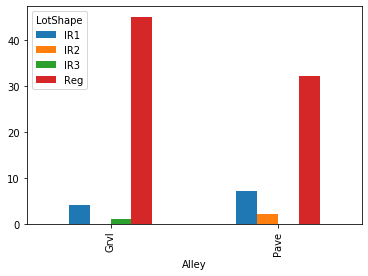

In [85]:

# Display
results = pd.crosstab(iowa_df['Alley'], iowa_df['LotShape'])
results.plot(kind='bar');

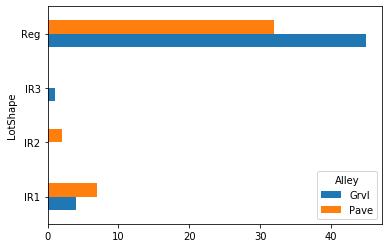

In [81]:

# Flip 
results = pd.crosstab(iowa_df['LotShape'], iowa_df['Alley'])
results.plot(kind='barh');

## Challenge

I hope you can see how we have used existing columns to create a new column on a dataset that say something new about our unit of observation. This is what making new features (columns) on a dataset is all about and why it's so essential to data science --particularly predictive modeling "Machine Learning." 

We'll spend the rest of the lecture and assignment today trying to get as good as we can at manipulating (cleaning) and creating new columns on datasets.

# [Objective](#work-with-strings) Work with Strings with Pandas

## Overview

So far we have worked with numeric datatypes (ints and floats) but we haven't worked with any columns containing string values. We can't simply use arithmetic to manipulate string values, so we'll need to learn some more techniques in order to work with this datatype.

## Follow Along

We're going to import a new dataset here to work with. This dataset is from LendingClub and holds information about loans issued in Q4 of 2018. This dataset is a bit messy so it will give us plenty of opportunities to clean up existing columns as well as create new ones.

The `!wget` shell command being used here does exactly the same thing that your browser does when you type a URL in the address. It makes a request or "gets" the file at that address. However, in our case the file isn't a webpage, it's a compressed CSV file. 

Try copying and pasting the URL from below into your browser, did it start an automatic download? Any URLs like this that start automatic downloads when navigated to can be used along with the `!wget` command to bring files directly into your notebook's memory.

### Load a new dataset

In [86]:
! wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip


--2020-03-14 03:24:36--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [           <=>      ]  21.71M   782KB/s    in 29s     

2020-03-14 03:25:06 (770 KB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22763850]



We need to use the `!unzip` command to extract the csv from the zipped folder.

In [87]:
! unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


We can also use bash/shell commands to look at the raw file using the `!head` and `!tail` commands

In [88]:
# Read in the CSV
loans_df = pd.read_csv('LoanStats_2018Q4.csv')
loans_df.head(7)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,7,13,18,19,24,25,27,28,29,30,31,32,34,36,37,38,39,40,41,42,43,44,46,49,50,51,53,54,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,113,114,115,116,117,118,119,120,121,126,127,131,132,134,135,136,141,142,143) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
id  member_id loan_amnt funded_amnt funded_amnt_inv term       int_rate installment grade sub_grade emp_title             emp_length home_ownership annual_inc verification_status issue_d  loan_status        pymnt_plan url desc purpose            title                   zip_code addr_state dti   delinq_2yrs earliest_cr_line inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc initial_list_status out_prncp out_prncp_inv total_pymnt      total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d collections_12_mths_ex_med mths_since_last_major_derog policy_code application_type annual_inc_joint dti_joint verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_act_il open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util chargeoff_within_12_mths delinq_amnt mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit revol_bal_joint sec_app_earliest_cr_line sec_app_inq_last_6mths sec_app_mort_acc sec_app_open_acc sec_app_revol_util sec_app_open_act_il sec_app_num_rev_accts sec_app_chargeoff_within_12_mths sec_app_collections_12_mths_ex_med sec_app_mths_since_last_major_derog hardship_flag hardship_type hardship_reason hardship_status deferral_term hardship_amount hardship_start_date hardship_end_date payment_plan_start_date hardship_length hardship_dpd hardship_loan_status orig_projected_additional_accrued_interest hardship_payoff_balance_amount hardship_last_payment_amount debt_settlement_flag debt_settlement_flag_date settlement_status settlement_date settlement_amount settlement_percentage                                    settlement_term                              
NaN NaN       10000     10000       10000            60 months  16.14%  243.93      C     C4        Sale Consultant       2 years    RENT           90000      Not Verified        Dec-2018 Fully Paid         n          NaN NaN  debt_consolidation Debt consolidation      079xx    NJ         8.8   0           Mar-1991         1              NaN                    43                     11       1       10582     58.5%      32        w                   0.00      0.00          10661.0577272374 10661.06        10000.00        661.06        0.0                0.0        0.0                     May-2019     9698.79         NaN          Dec-2019           0                          NaN                         1           Individual       NaN              NaN       NaN                       0              0            15470       1           1           0           1           18                 4888         65      1           3           2969       60       18100            2      0           2            4                    1719        4906           67.3    0                        0           133                333                  2                     2              1        2                    NaN                      1                     NaN                            0                     4              6               5           15        6         8             23            6                   11       0                0            0                  1                  100   

As we look at the raw file itself, do you see anything that might cause us trouble as we read in the CSV file to a dataframe?

In [0]:
# Read in the CSV

The extra rows at the top and bottom of the file have done two things:

1) The top row has made it so that the entire dataset is being interpreted as column headers

2) The bottom two rows have been read into the 'id' column and are causing every column to have at least two `NaN` values in it.

In [0]:
# We can fix the header problem by using the 'skiprows' parameter

In [89]:
loans_df = pd.read_csv('LoanStats_2018Q4.csv', header=1, skipfooter=2, engine='python')
loans_df.tail(7)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
128277,NaN,NaN,5000,5000,5000.0,36 months,16.14%,176.14,C,C4,Oncology Medical Assistant,3 years,MORTGAGE,46400.0,Source Verified,Oct-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,338xx,FL,16.85,0,Nov-2003,0,29.0,NaN,10,0,6722,62.2%,18,w,0.00,0.00,5436.02672,5436.03,...,100.0,0,0,161585,19979,3000,14875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128278,NaN,NaN,5600,5600,5600.0,36 months,13.56%,190.21,C,C1,NaN,NaN,RENT,15600.0,Not Verified,Oct-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,836xx,ID,15.31,0,Aug-2012,0,NaN,97.0,9,1,5996,34.5%,11,w,3387.58,3387.58,3032.81000,3032.81,...,25.0,1,0,17400,5996,8600,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128279,NaN,NaN,23000,23000,23000.0,36 months,15.02%,797.53,C,C3,Tax Consultant,10+ years,MORTGAGE,75000.0,Source Verified,Oct-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,352xx,AL,20.95,1,Aug-1985,2,22.0,NaN,12,0,22465,43.6%,28,w,0.00,0.00,1547.08000,1547.08,...,14.3,0,0,296500,40614,47100,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128280,NaN,NaN,10000,10000,10000.0,36 months,15.02%,346.76,C,C3,security guard,5 years,MORTGAGE,38000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,443xx,OH,13.16,3,Jul-1982,0,6.0,NaN,11,0,5634,37.1%,16,w,6101.42,6101.42,5539.82000,5539.82,...,40.0,0,0,91403,9323,9100,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128281,NaN,NaN,5000,5000,5000.0,36 months,13.56%,169.83,C,C1,Payoff Clerk,10+ years,MORTGAGE,35360.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,381xx,TN,11.30,1,Jun-2006,0,21.0,NaN,9,0,2597,27.3%,15,f,3024.63,3024.63,2713.51000,2713.51,...,50.0,0,0,93908,4976,3000,6028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128282,NaN,NaN,10000,10000,9750.0,36 months,11.06%,327.68,B,B3,NaN,NaN,RENT,44400.0,Source Verified,Oct-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,980xx,WA,11.78,0,Oct-2008,2,40.0,NaN,15,0,6269,13.1%,25,f,5959.76,5810.77,5227.52000,5096.83,...,0.0,0,0,57871,16440,20500,10171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128283,NaN,NaN,10000,10000,10000.0,36 months,16.91%,356.08,C,C5,Key Accounts Manager,2 years,RENT,80000.0,Not Verified,Oct-20

In [90]:
# We can fix the header problem by using the 'skiprows' parameter
loans_df = pd.read_csv('LoanStats_2018Q4.csv', skiprows=1, skipfooter=2, engine='python')
loans_df.tail(7)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
128277,NaN,NaN,5000,5000,5000.0,36 months,16.14%,176.14,C,C4,Oncology Medical Assistant,3 years,MORTGAGE,46400.0,Source Verified,Oct-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,338xx,FL,16.85,0,Nov-2003,0,29.0,NaN,10,0,6722,62.2%,18,w,0.00,0.00,5436.02672,5436.03,...,100.0,0,0,161585,19979,3000,14875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128278,NaN,NaN,5600,5600,5600.0,36 months,13.56%,190.21,C,C1,NaN,NaN,RENT,15600.0,Not Verified,Oct-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,836xx,ID,15.31,0,Aug-2012,0,NaN,97.0,9,1,5996,34.5%,11,w,3387.58,3387.58,3032.81000,3032.81,...,25.0,1,0,17400,5996,8600,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128279,NaN,NaN,23000,23000,23000.0,36 months,15.02%,797.53,C,C3,Tax Consultant,10+ years,MORTGAGE,75000.0,Source Verified,Oct-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,352xx,AL,20.95,1,Aug-1985,2,22.0,NaN,12,0,22465,43.6%,28,w,0.00,0.00,1547.08000,1547.08,...,14.3,0,0,296500,40614,47100,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128280,NaN,NaN,10000,10000,10000.0,36 months,15.02%,346.76,C,C3,security guard,5 years,MORTGAGE,38000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,443xx,OH,13.16,3,Jul-1982,0,6.0,NaN,11,0,5634,37.1%,16,w,6101.42,6101.42,5539.82000,5539.82,...,40.0,0,0,91403,9323,9100,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128281,NaN,NaN,5000,5000,5000.0,36 months,13.56%,169.83,C,C1,Payoff Clerk,10+ years,MORTGAGE,35360.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,381xx,TN,11.30,1,Jun-2006,0,21.0,NaN,9,0,2597,27.3%,15,f,3024.63,3024.63,2713.51000,2713.51,...,50.0,0,0,93908,4976,3000,6028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128282,NaN,NaN,10000,10000,9750.0,36 months,11.06%,327.68,B,B3,NaN,NaN,RENT,44400.0,Source Verified,Oct-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,980xx,WA,11.78,0,Oct-2008,2,40.0,NaN,15,0,6269,13.1%,25,f,5959.76,5810.77,5227.52000,5096.83,...,0.0,0,0,57871,16440,20500,10171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128283,NaN,NaN,10000,10000,10000.0,36 months,16.91%,356.08,C,C5,Key Accounts Manager,2 years,RENT,80000.0,Not Verified,Oct-20

Lets look at the NaN values of each column so that you can see the problem that the extra rows at the bottom of the file are creating for us

In [0]:
# Sum null values by column and sort from least to greatest

In [91]:
pd.set_option('display.max_rows', 100)
loans_df.isnull().sum().sort_values(ascending=False)

id                                            128284
desc                                          128284
member_id                                     128284
url                                           128284
orig_projected_additional_accrued_interest    128025
                                               ...  
inq_last_12m                                       0
acc_open_past_24mths                               0
chargeoff_within_12_mths                           0
delinq_amnt                                        0
inq_fi                                             0
Length: 144, dtype: int64

In [0]:
# Address the extra NaNs in each column by skipping the footer as well.

For good measure, we'll also drop some columns that are made up completely of NaN values.

Why might LendingClub have included columns in their dataset that are 100% blank?

### Clean up the `int_rate` column

When we're preparing a dataset for a machine learning model we typically want to represent don't want to leave any string values in our dataset --because it's hard to do math on words. 

Specifically, we have a column that is representing a numeric value, but currently doesn't have a numeric datatype. Lets look at the first 10 values of the `int_rate` column

In [0]:
# Look at the first 10 values of the int_rate column

In [92]:
# Look at the first 10 values of the int_rate column
loans_df['int_rate'].head(10)

0     16.14%
1     11.80%
2     11.31%
3     14.47%
4     27.27%
5     16.14%
6     12.98%
7     10.33%
8     23.40%
9     10.72%
Name: int_rate, dtype: object

In [0]:
# Look at a specific value from the int_rate column

In [93]:
loans_df['int_rate'][3]

' 14.47%'

In [94]:

# Confirm
type(loans_df['int_rate'][3])

str

Problems that we need to address with this column:

- String column that should be numeric
- Percent Sign `%` included with the number
- Leading space at the beginning of the string

However, we're not going to try and write exactly the right code to fix this column in one go. We're going to methodically build up to the code that will help us address these problems.


In [0]:
# Lets start with just fixing a single string.
# If we can fix one, we can usually fix all of them

In [0]:
int_rate = ' 14.47%'

In [96]:
# remove leading space
int_rate.strip()

'14.47%'

In [97]:
# remove percent
int_rate.strip('%')

' 14.47'

In [98]:

# remove both
int_rate.strip().strip('%')

'14.47'

In [0]:
# "Cast" the string value to a float

In [99]:
float('14.47')

14.47

In [100]:
# put it all together
float(int_rate.strip().strip('%'))

14.47

In [101]:
# check our work
type(float(int_rate.strip().strip('%')) )

float

### Write a function to make our solution reusable!

In [0]:
# Write a function that can do what we have written above to any 
# string that is passsed to it.

In [0]:
def myfunc(cell_contents):
  return float(cell_contents.strip().strip('%'))

In [0]:
# Test out our function by calling it on our example

In [104]:
myfunc(int_rate)

14.47

In [105]:
# is the data type correct?
type(myfunc(int_rate))

float

### Apply our solution to every cell in a column

In [0]:
new_list = []

In [0]:
# for loop:
for cell in loans_df['int_rate']:
  new_list.append(myfunc(cell))

In [108]:
# look at first 10 values of that list:
new_list[:10]

[16.14, 11.8, 11.31, 14.47, 27.27, 16.14, 12.98, 10.33, 23.4, 10.72]

In [109]:
# compare to original values
list(loans_df['int_rate'][:10])

[' 16.14%',
 ' 11.80%',
 ' 11.31%',
 ' 14.47%',
 ' 27.27%',
 ' 16.14%',
 ' 12.98%',
 ' 10.33%',
 ' 23.40%',
 ' 10.72%']

In [110]:
# convert that list to a new column
loans_df['int_rate_cleaned']= pd.Series(new_list)
loans_df[['int_rate', 'int_rate_cleaned']].head()

,int_rate,int_rate_cleaned
0,16.14%,16.14
1,11.80%,11.80
2,11.31%,11.31
3,14.47%,14.47
4,27.27%,27.27


In [111]:
# convert that list to a new column (not as list!)
loans_df['int_rate_cleaned_X']= new_list
loans_df[['int_rate', 'int_rate_cleaned_X']].head()

,int_rate,int_rate_cleaned_X
0,16.14%,16.14
1,11.80%,11.80
2,11.31%,11.31
3,14.47%,14.47
4,27.27%,27.27


In [0]:
# What type of data is held in our new column?

# Look at the datatypes of the last 5 columns

In [113]:
# What type of data is held in our new column?
loans_df[['int_rate', 'int_rate_cleaned_X']].dtypes

int_rate               object
int_rate_cleaned_X    float64
dtype: object

In [114]:

# improve all of this code with the .apply function!
loans_df['int_rate_cleaned2'] = loans_df['int_rate'].apply(myfunc)
loans_df[['int_rate', 'int_rate_cleaned', 'int_rate_cleaned2']].head()

,int_rate,int_rate_cleaned,int_rate_cleaned2
0,16.14%,16.14,16.14
1,11.80%,11.80,11.80
2,11.31%,11.31,11.31
3,14.47%,14.47,14.47
4,27.27%,27.27,27.27


## Challenge

We can create a new column with our cleaned values or overwrite the original, whatever we think best suits our needs. On your assignment you will take the same approach in trying to methodically build up the complexity of your code until you have a few lines that will work for any cell in a column. At that point you'll contain all of that functionality in a reusable function block and then use the `.apply()` function to... well... apply those changes to an entire column.

# [Objective](#pandas-apply) Modify and Create Columns using `.apply()`



## Overview

We're already seen one example of using the `.apply()` function to clean up a column. Lets see if we can do it again, but this time on a slightly more complicated use case.

Remember, the goal here is to write a function that will work correctly on any **individual** cell of a specific column. Then we can reuse that function on those individual cells of a dataframe column via the `.apply()` function.

Lets clean up the emp_title "Employment Title" column!

## Follow Along

First we'll try and diagnose how bad the problem is and what improvements we might be able to make.

In [0]:
# Look at the top 20 employment titles

In [116]:
loans_df['emp_title'].head(20)

0                      Sale Consultant
1                            Educator 
2                Accounts Examiner III
3                              teacher
4                       Claims Analyst
5                     Training Manager
6                         Tire builder
7                               Driver
8                               BANKER
9                     Business Analyst
10                            OPERATOR
11                    Shift Supervisor
12          Program Support Assistant 
13              Reference/YA Librarian
14                      Senior manager
15    Sr. Vice President -Risk Manager
16                                 NaN
17                         Haz Mat S/R
18                       Especialist 1
19                            Shipping
Name: emp_title, dtype: object

In [0]:
# How many different unique employment titles are there currently?

In [120]:
# another way to do this
loans_df['emp_title'].nunique()

43851

In [0]:
# How often is the employment_title null?

In [121]:
# How often is the employment_title null?
loans_df['emp_title'].isnull().sum()

20922

What are some possible reasons as to why a person's employment title may have not been provided?

In [0]:
# Create some examples that represent the cases that we want to clean up

In [0]:
examples = ['owner', 'Supervisor', ' Project Manager', np.nan]

In [0]:
# Write a function to clean up these use cases and increase uniformity.

In [0]:
# Write a function to clean up these use cases and increase uniformity.

def clean_title(job_title):
  if isinstance(job_title, str):
    return job_title.title().strip()
  else:
    return "Unknown"

In [0]:
# list comprehensions can combine function calls and for loops over lists
# into one succinct and fairly readable single line of code.

In [0]:
empty_list=[]
for title in examples:
  empty_list.append(clean_title(title))

In [0]:
# We have a function that works as expected. Lets apply it to our column.
# This time we'll overwrite the original column

In [0]:
loans_df['emp_title_cleaned'] = loans_df['emp_title'].apply(clean_title)

In [128]:
# check our work
loans_df[['emp_title', 'emp_title_cleaned']].sample(10)

,emp_title,emp_title_cleaned
44914,NaN,Unknown
79782,Plant Manager,Plant Manager
71727,Truck Driver,Truck Driver
65447,program manager,Program Manager
15353,Security Specialist,Security Specialist
92649,Events Coordinator,Events Coordinator
118621,Lineman,Lineman
44108,Radiologic technologist,Radiologic Technologist
30869,Market Area Manager,Market Area Manager
21683,Manager,Manager


We can use the same code as we did earlier to see how much progress was made.


In [129]:
# Look at the top 20 employment titles
loans_df['emp_title_cleaned'].value_counts().head(8)

Unknown             20922
Teacher              2553
Manager              2393
Registered Nurse     1416
Driver               1258
Supervisor           1160
Truck Driver          920
Rn                    832
Name: emp_title_cleaned, dtype: int64

In [130]:
# How many different unique employment titles are there currently?
loans_df['emp_title_cleaned'].nunique()

34877

In [132]:
# recoding a categorical
loans_df['new_emp_title']='All others'
loans_df.loc[loans_df['emp_title']=='Manager','new_emp_title' ]='Manager'
loans_df.loc[loans_df['emp_title']=='Teacher','new_emp_title' ]='Teacher'
loans_df['new_emp_title'].value_counts()

All others    124425
Teacher         2088
Manager         1771
Name: new_emp_title, dtype: int64

In [134]:
# How often is the employment_title null (NaN)?
loans_df['emp_title_cleaned'].isnull().sum()


0

## Challenge

Using the .apply() function isn't always about creating new columns on a dataframe, we can use it to clean up or modify existing columns as well. 

# [Objective](#dates-and-times) Work with Dates and Times with Pandas

## Overview

Pandas has its own datatype datatype that makes it extremely convenient to convert strings that are in standard date formates to datetime objects and then use those datetime objects to either create new features on a dataframe or work with the dataset in a timeseries fashion. 

This section will demonstrate how to take a column of date strings, convert it to a datetime object and then use the datetime formatting `.dt` to access specific parts of the date (year, month, day) to generate useful columns on a dataframe.

## Follow Along

### Work with Dates 

pandas documentation
- [to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)
- [Time/Date Components](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components) "You can access these properties via the `.dt` accessor"

Many of the most useful date columns in this dataset have the suffix `_d` to indicate that they correspond to dates.

We'll use a list comprehension to print them out

In [135]:
# list all columns
loans_df.columns[:30]

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record'],
      dtype='object')

Lets look at the string format of the `issue_d` column

In [137]:
 # check out one column
loans_df['issue_d'].head()

0    Dec-2018
1    Dec-2018
2    Dec-2018
3    Dec-2018
4    Dec-2018
Name: issue_d, dtype: object

In [138]:
# as a for loop:
mylist = []
for col in loans_df.columns:
  if col.endswith('_d'):
    mylist.append(col)
mylist

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [0]:
# as a list comprehension:
my_date_cols = [col for col in loans_df.columns if col.endswith('_d')]

In [141]:
loans_df['issue_d'].dtype

dtype('O')

In [142]:
print(loans_df['issue_d'][0])
type(loans_df['issue_d'][0])

Dec-2018


str

Because this string format %m-%y is a common datetime format, we can just let Pandas detect this format and translate it to the appropriate datetime object.

In [143]:
# infer_datetime_format=True
loans_df['new_issue_d'] = pd.to_datetime(loans_df['issue_d'], infer_datetime_format=True)

loans_df[['issue_d','new_issue_d']]

,issue_d,new_issue_d
0,Dec-2018,2018-12-01
1,Dec-2018,2018-12-01
2,Dec-2018,2018-12-01
3,Dec-2018,2018-12-01
4,Dec-2018,2018-12-01
...,...,...
128279,Oct-2018,2018-10-01
128280,Oct-2018,2018-10-01
128281,Oct-2018,2018-10-01
128282,Oct-2018,2018-10-01


In [145]:
# check our work
type(loans_df['new_issue_d'][0])

print(loans_df['new_issue_d'].dtype)

datetime64[ns]


In [147]:
loans_df['new_issue_d'].head().values

array(['2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [151]:
# Lets add these year and month values as new columns on our data frame.
# same thing, diff var
loans_df['new_last_credit_pull_d'] = pd.to_datetime(loans_df['last_credit_pull_d'])
loans_df[['last_credit_pull_d','new_last_credit_pull_d']].head()

,last_credit_pull_d,new_last_credit_pull_d
0,Dec-2019,2019-12-01
1,Jan-2020,2020-01-01
2,Feb-2020,2020-02-01
3,Jan-2020,2020-01-01
4,Jan-2020,2020-01-01


You can see how the month and year have been indicated by the strings that were contained in the column previously, and that the rest of the values have been inferred.

In [163]:
loans_df['new_issue_d'].head().values

array(['2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

We can use the `.dt` accessor to now grab specific parts of the datetime object. Lets grab just the year from the all of the cells in the `issue_d` column

In [162]:
loans_df['year'] = loans_df['new_issue_d'].dt.year
loans_df[['issue_d', 'new_issue_d', 'year']].sample(7)

,issue_d,new_issue_d,year
96925,Oct-2018,2018-10-01,2018
71870,Nov-2018,2018-11-01,2018
53059,Nov-2018,2018-11-01,2018
102922,Oct-2018,2018-10-01,2018
85348,Oct-2018,2018-10-01,2018
114957,Oct-2018,2018-10-01,2018
97324,Oct-2018,2018-10-01,2018


Now the month.

In [161]:
loans_df['month'] = loans_df['new_issue_d'].dt.month
loans_df[['issue_d', 'new_issue_d', 'year', 'month']].sample(7)

,issue_d,new_issue_d,year,month
41006,Nov-2018,2018-11-01,2018,11
32673,Dec-2018,2018-12-01,2018,12
90733,Oct-2018,2018-10-01,2018,10
10602,Dec-2018,2018-12-01,2018,12
102096,Oct-2018,2018-10-01,2018,10
29164,Dec-2018,2018-12-01,2018,12
16890,Dec-2018,2018-12-01,2018,12


In [160]:
# look at their types!
loans_df['weekday'] = loans_df['new_issue_d'].dt.weekday
loans_df[['issue_d', 'new_issue_d', 'year', 'month', 'weekday']].sample(7)

,issue_d,new_issue_d,year,month,weekday
102777,Oct-2018,2018-10-01,2018,10,0
50904,Nov-2018,2018-11-01,2018,11,3
27468,Dec-2018,2018-12-01,2018,12,5
68046,Nov-2018,2018-11-01,2018,11,3
22452,Dec-2018,2018-12-01,2018,12,5
79548,Nov-2018,2018-11-01,2018,11,3
91192,Oct-2018,2018-10-01,2018,10,0


It's just that easy! Now, instead of printing them out, lets add these year and month values as new columns on our dataframe. Again, you'll have to scroll all the way over to the right in the table to see the new columns.

In [155]:
# same thing, diff var
loans_df['new_last_credit_pull_d'] = pd.to_datetime(loans_df['last_credit_pull_d'])
loans_df[['last_credit_pull_d','new_last_credit_pull_d']].head()

,last_credit_pull_d,new_last_credit_pull_d
0,Dec-2019,2019-12-01
1,Jan-2020,2020-01-01
2,Feb-2020,2020-02-01
3,Jan-2020,2020-01-01
4,Jan-2020,2020-01-01


Because all of these dates come from Q4 of 2018, the `issue_d` column isn't all that interesting. Lets look at the `earliest_cr_line` column, which is also a string, but that could be converted to datetime format.

We're going to create a new column called `days_from_earliest_credit_to_issue`

It's a long column header, but think about how valuable this piece of information could be. This number will essentially indicate the length of a person's credit history and if that is correlated with repayment or other factors could be a valuable predictor!

In [0]:
# date arithmetic
loans_df['day_diff'] =  loans_df['new_issue_d'] - loans_df['new_last_credit_pull_d']

In [157]:
# check that out
loans_df[['issue_d', 'last_credit_pull_d', 'day_diff']]

,issue_d,last_credit_pull_d,day_diff
0,Dec-2018,Dec-2019,-365 days
1,Dec-2018,Jan-2020,-396 days
2,Dec-2018,Feb-2020,-427 days
3,Dec-2018,Jan-2020,-396 days
4,Dec-2018,Jan-2020,-396 days
...,...,...,...
128279,Oct-2018,Nov-2018,-31 days
128280,Oct-2018,Jan-2020,-457 days
128281,Oct-2018,Jan-2020,-457 days
128282,Oct-2018,Jan-2020,-457 days


In [158]:
loans_df['day_diff'].value_counts().sort_index().tail()

-30 days     89
0 days      514
30 days      80
31 days      33
61 days       1
Name: day_diff, dtype: int64

What we're about to do is so cool! Pandas' datetime format is so smart that we can simply use the subtraction operator `-` in order to calculate the amount of time between two dates. 

Think about everything that's going on under the hood in order to give us such straightforward syntax! Handling months of different lengths, leap years, etc. Pandas datetime objects are seriously powerful!

What's oldest credit history that was involved in Q4 2018? 

In [159]:
loans_df['day_diff'].describe()

count                        128283
mean     -412 days +12:30:45.083088
std         70 days 13:50:06.866943
min             -488 days +00:00:00
25%             -457 days +00:00:00
50%             -426 days +00:00:00
75%             -396 days +00:00:00
max                61 days 00:00:00
Name: day_diff, dtype: object

25,171 days is ~ 68.96 years of credit history!

## Challenge

Pandas' datetime format is so easy to work with that there's really no excuse for not using dates to make features on a dataframe! Get ready to practice more of this on your assignment.